## Inteligência Artificial 
### Professor Yuri Malheiros
#### Tarefas

 * Ler arquivo com os dados de treinamento 
 * Separar teste e treino 
 * Treinar um modelo de regressão linear 
 * Avaliar o modelo usando validação cruzada
 * Apresentar gráfico com pontos representando os exemplos e a reta resultado da regressão linear (bônus: 1 ponto extra)


Para este trabalho os valores das colunas rating e totalReviews serão usados
para prever os valores da coluna prices.

No arquivo, alguns exemplos não possuem preço, por isso, eles devem ser descartados. 

Resposta
O modelo deve ser avaliado utilizando validação cruzada. Assim, o programa
deve exibir o erro médio quadrático no conjunto de treinamento e no conjunto
de testes.

É necessário acertar todas as previsões? Não. Muitas vezes os modelos não
conseguem acertar 100% e isso pode acontecer nesse problema também.

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

- Ler arquivo com os dados de treinamento

In [2]:
itens = pd.read_csv("items.csv")
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
asin            792 non-null object
brand           792 non-null object
title           792 non-null object
url             792 non-null object
image           792 non-null object
rating          792 non-null float64
reviewUrl       792 non-null object
totalReviews    792 non-null int64
prices          577 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


- No arquivo, alguns exemplos não possuem preço, por isso, eles devem ser descartados.

In [3]:
i = itens.dropna() 
i.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 1 to 791
Data columns (total 9 columns):
asin            577 non-null object
brand           577 non-null object
title           577 non-null object
url             577 non-null object
image           577 non-null object
rating          577 non-null float64
reviewUrl       577 non-null object
totalReviews    577 non-null int64
prices          577 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


- Conserta erros (dois preços, $, tipo object) da coluna prices

In [4]:
def limpaPreco(preco): 
  preco = preco.split(',')[0]
  preco = preco.replace('$', '')

  return float(preco)

i['prices'] = i.apply(lambda row: limpaPreco(row['prices']), axis=1)

/home/mirian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


- Para este trabalho os valores das colunas rating e totalReviews serão usados para prever os valores da coluna prices.

In [5]:
rating_reviews = i[['rating','totalReviews']]
prices = i.prices

- Separar teste e treino

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(rating_reviews, prices, test_size=0.4, random_state=42)

- Treinar um modelo de regressão linear

In [7]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
print('linear model coeff (w): {}'
.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
.format(linreg.score(xtrain, ytrain)))
print('R-squared score (test): {:.3f}'
.format(linreg.score(xtest, ytest)))

linear model coeff (w): [ 3.26309092e+01 -1.92027647e-02]
linear model intercept (b): 130.572
R-squared score (training): 0.023
R-squared score (test): 0.035


In [8]:
ipred = linreg.predict(xtest)
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ipred))
print('Coefficient of determination: %.2f'
      % r2_score(ytest, ipred))

Mean squared error: 31254.80
Coefficient of determination: 0.04


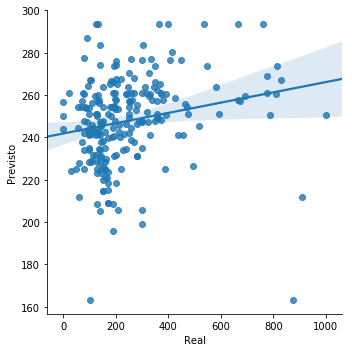

In [9]:
df = pd.DataFrame ({'Real': ytest, 'Previsto': ipred}) 
sns.lmplot(x="Real", y="Previsto", data=df);

- Tentativa de melhorar a predição do modelo com Descida de Gradiente

In [10]:
from sklearn import ensemble
params = {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(xtrain,ytrain)
print('R2 sq: ',model_score)
predicted = model.predict(xtest)

print("Mean squared error: %.2f"% mean_squared_error(ytest, predicted))
print('Test Variance score: %.2f' % r2_score(ytest, predicted))

R2 sq:  0.075403353583677
Mean squared error: 31350.70
Test Variance score: 0.03


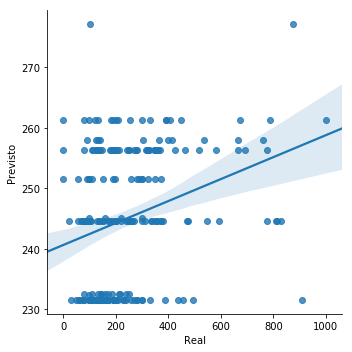

In [12]:
df2 = pd.DataFrame ({'Real': ytest, 'Previsto': predicted}) 
sns.lmplot(x="Real", y="Previsto", data=df2);

- Avaliar o modelo usando validação cruzada

In [13]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
model = svm.SVC()
accuracy = cross_val_score(model, rating_reviews, prices, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

/home/mirian/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

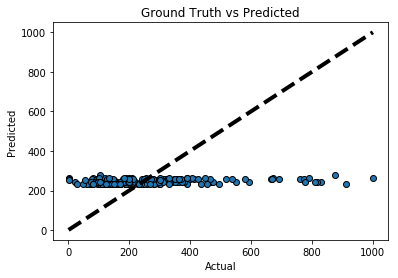

In [14]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(ytest, predicted, edgecolors=(0, 0, 0))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()